In [1]:
import cv2 as cv 
import numpy as np 
import seaborn as sns
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
pretrained = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

In [3]:
capture = cv.VideoCapture(0)
#capture = cv.VideoCapture('mask.mp4')

data = []

while True:
    ret, img = capture.read()
    if ret:
        faces = pretrained.detectMultiScale(img)
        for x,y,w,h in faces:
            cv.rectangle(img, (x,y), (x+w, y+h), (255,0,255), 4)
            face = img[y:y+h, x:x+w, :]
            face = cv.resize(face, (50,50))
            print(len(data))
            if len(data) < 400:
                data.append(face)
        cv.imshow('Window', img)
        if cv.waitKey(2) == 27 or len(data) >= 200:
            break

capture.release() 
cv.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [4]:
np.save('mask.npy', data)

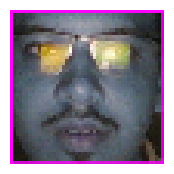

In [5]:
plt.figure(figsize=(2,2))
plt.imshow(data[0]) 
plt.axis(False)
plt.show()

In [6]:
capture = cv.VideoCapture(0)
#capture = cv.VideoCapture('no_mask.mp4')

data = []

while True:
    ret, img = capture.read()
    if ret:
        faces = pretrained.detectMultiScale(img)
        for x,y,w,h in faces:
            cv.rectangle(img, (x,y), (x+w, y+h), (255,0,255), 4) 
        face = img[y:y+h, x:x+w, :]
        face = cv.resize(face, (50,50))
        #print(len(data))
        if len(data) < 400: 
            data.append(face)
    cv.imshow('Window', img)
    if cv.waitKey(2) == 27 or len(data) >= 200:
        break

capture.release() 
cv.destroyAllWindows()


In [7]:
np.save('no_mask.npy', data)

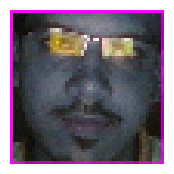

In [8]:
plt.figure(figsize=(2,2))
plt.imshow(data[5]) 
plt.axis(False)
plt.show()

In [9]:
mask = np.load('mask.npy') 
no_mask = np.load('no_mask.npy')

In [10]:
print(mask.shape)
print(no_mask.shape)

(200, 50, 50, 3)
(200, 50, 50, 3)


In [11]:
no_mask = no_mask.reshape(200,50*50*3)
print(mask.shape)
print(no_mask.shape)

(200, 50, 50, 3)
(200, 7500)


In [12]:
no_mask_reshaped = no_mask.reshape(len(no_mask), -1)
mask_reshaped = mask.reshape(len(mask), -1)
X = np.concatenate((no_mask_reshaped, mask_reshaped))

In [13]:
y = np.zeros(X.shape[0]) 
y.shape

(400,)

In [14]:
# 1st 200 = mask, others = no mask
y[200:] = 1.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
print(len(X_train))
print(len(X_test)) 
print(len(y_train)) 
print(len(y_test))

320
80
320
80


In [17]:
print(X_train.shape) 
print(X_test.shape)

(320, 7500)
(80, 7500)


In [18]:
# 7500 is a big no, this cause slowing our ML process, So Dimensionality Reduction of ML
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
print(X_train.shape) 
print(X_test.shape)


(320, 3)
(80, 3)


In [19]:
print(X_train[0])

[ 1200.80170501 -2016.47813108  -849.2644768 ]


In [20]:
model = SVC() 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7375

In [21]:
y_pred = model.predict(X_test)
y_pred

array([1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.])

In [22]:
y_test

array([1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.])

In [23]:
accuracy_score(y_test, y_pred)

0.7375

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78        43
         1.0       0.81      0.57      0.67        37

    accuracy                           0.74        80
   macro avg       0.76      0.73      0.73        80
weighted avg       0.75      0.74      0.73        80



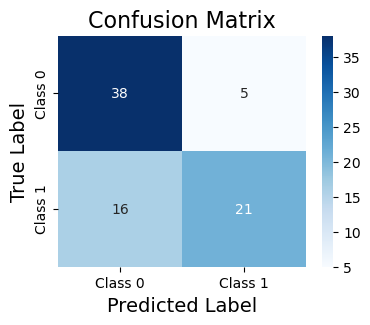

In [25]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()



In [26]:
capture = cv.VideoCapture(0)
# capture = cv.VideoCapture('full.mp4')

logo_left = cv.imread('1.jpg')
logo_right = cv.imread('2.jpg')

logo_left = cv.resize(logo_left, (100, 100))
logo_right = cv.resize(logo_right, (100, 100))

logo_left_gray = cv.cvtColor(logo_left, cv.COLOR_BGR2GRAY)
_, mask_left = cv.threshold(logo_left_gray, 1, 255, cv.THRESH_BINARY)
logo_right_gray = cv.cvtColor(logo_right, cv.COLOR_BGR2GRAY)
_, mask_right = cv.threshold(logo_right_gray, 1, 255, cv.THRESH_BINARY)

names = {0: 'Mask', 1: 'No Mask'}
font = cv.FONT_HERSHEY_COMPLEX

while True:
    ret, img = capture.read()
    if ret:
        faces = pretrained.detectMultiScale(img)
        for x, y, w, h in faces:
            cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 4)
            face = img[y:y + h, x:x + w, :]
            face = cv.resize(face, (50, 50))
            face = face.reshape(1, -1)
            face = pca.transform(face)
            pred = model.predict(face)
            n = names[int(pred)]
            cv.putText(img, n, (x, y), font, 1, (244, 250, 250), 2)

        cv.putText(img, 'Deep Learning Project', (150, 50), font, 1, (0, 255, 0), 2)
       
        roi_left = img[0:100, 0:100]
        roi_left[np.where(mask_left)] = 0
        roi_left += logo_left

        roi_right = img[0:100, img.shape[1] - 100:img.shape[1]]
        roi_right[np.where(mask_right)] = 0
        roi_right += logo_right

        cv.imshow('Window', img)
        if cv.waitKey(2) == 27:
            break

capture.release()
cv.destroyAllWindows()

C:\Users\NLN\AppData\Local\Temp\ipykernel_7452\836032097.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = names[int(pred)]
C:\Users\NLN\AppData\Local\Temp\ipykernel_7452\836032097.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = names[int(pred)]
C:\Users\NLN\AppData\Local\Temp\ipykernel_7452\836032097.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = names[int(pred)]
C:\Users\NLN\AppData\Local\Temp\ipykernel_7452\836032097.py:29: DeprecationW